<a href="https://colab.research.google.com/github/GauraoM/Deep-Learning/blob/main/Image_Classification_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-05-21 12:37:47--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.74.20.142, 2600:1417:8000:980::e59, 2600:1417:8000:9b2::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.74.20.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.4’

kagglecatsanddogs_5 100%[===================>] 786.67M   163MB/s    in 5.3s    

2022-05-21 12:37:52 (150 MB/s) - ‘kagglecatsanddogs_5340.zip.4’ saved [824887076/824887076]



In [15]:
!unzip -q kagglecatsanddogs_5340.zip
!ls

replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
 CDLA-Permissive-2.0.pdf        kagglecatsanddogs_5340.zip.2   PetImages
 kagglecatsanddogs_5340.zip     kagglecatsanddogs_5340.zip.3  'readme[1].txt'
 kagglecatsanddogs_5340.zip.1   kagglecatsanddogs_5340.zip.4   sample_data


In [16]:
!ls  PetImages


Cat  Dog


##### filter out badly-encoded images that do not feature the string "JFIF" in their heade

In [17]:
import os

num_skipped = 0
# Iterate over cat and dog
for folder_name in ("Cat", "Dog"):
  print(folder_name)
  folder_path = os.path.join("PetImages",folder_name)
  # print(folder_path)
  for fname in os.listdir(folder_path):
    # print(fname)
    # Join the folder path with filename
    fpath = os.path.join(folder_path, fname)
    print(fpath)
    try:
      fobj = open(fpath,'rb')
      # Converted string to JFIF Bytes and return first 10
      is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
      # print(is_jfif)
    finally:
      fobj.close()
    
    if not is_jfif:
      num_skipped +=1
      # Delete the corruplted image
      os.remove(fpath)


Streaming output truncated to the last 5000 lines.
PetImages/Dog/8523.jpg
PetImages/Dog/708.jpg
PetImages/Dog/11133.jpg
PetImages/Dog/218.jpg
PetImages/Dog/12349.jpg
PetImages/Dog/69.jpg
PetImages/Dog/8416.jpg
PetImages/Dog/4786.jpg
PetImages/Dog/1470.jpg
PetImages/Dog/5038.jpg
PetImages/Dog/3311.jpg
PetImages/Dog/6999.jpg
PetImages/Dog/11421.jpg
PetImages/Dog/83.jpg
PetImages/Dog/1442.jpg
PetImages/Dog/11588.jpg
PetImages/Dog/3155.jpg
PetImages/Dog/3011.jpg
PetImages/Dog/3014.jpg
PetImages/Dog/7704.jpg
PetImages/Dog/2401.jpg
PetImages/Dog/1823.jpg
PetImages/Dog/6854.jpg
PetImages/Dog/1608.jpg
PetImages/Dog/5345.jpg
PetImages/Dog/8279.jpg
PetImages/Dog/974.jpg
PetImages/Dog/7922.jpg
PetImages/Dog/7767.jpg
PetImages/Dog/4475.jpg
PetImages/Dog/9593.jpg
PetImages/Dog/3757.jpg
PetImages/Dog/9128.jpg
PetImages/Dog/10850.jpg
PetImages/Dog/5485.jpg
PetImages/Dog/5276.jpg
PetImages/Dog/4766.jpg
PetImages/Dog/3150.jpg
PetImages/Dog/4571.jpg
PetImages/Dog/1389.jpg
PetImages/Dog/10597.jpg
PetImag

####  Generate a Dataset

In [18]:
# Set Parameters
image_size = (180,180)
batch_size = 32

# Perform Splitting
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages", 
    validation_split = 0.2,
    subset="training",
    seed =1337,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages", 
    validation_split = 0.2,
    subset="validation",
    seed =1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


#### Visualize the image

[[[121 156 133]
  [127 157 128]
  [ 97 131  91]
  ...
  [ 84  87  68]
  [159 172 152]
  [123 121 107]]

 [[135 162 140]
  [107 112  89]
  [ 87  75  50]
  ...
  [188 186 178]
  [126 136 113]
  [130 132 100]]

 [[ 80  92  66]
  [121 117  94]
  [137 117  99]
  ...
  [124 122 105]
  [123 116 106]
  [ 86  75  69]]

 ...

 [[201 176 159]
  [108  88  71]
  [ 95  88  69]
  ...
  [115 131  78]
  [169 196 146]
  [158 194 146]]

 [[148 133 109]
  [103 108  87]
  [134 146 125]
  ...
  [136 136 115]
  [ 69  70  42]
  [119 127  92]]

 [[ 94  84  63]
  [137 141 112]
  [183 193 168]
  ...
  [115 130  96]
  [104 114  82]
  [144 151 114]]]
[[[100  77  76]
  [100  73  68]
  [ 99  71  63]
  ...
  [ 76  42  40]
  [ 79  68  63]
  [101  86  87]]

 [[ 92  54  55]
  [ 93  51  48]
  [ 91  47  41]
  ...
  [ 73  41  39]
  [ 82  73  68]
  [ 98  87  87]]

 [[ 94  50  47]
  [ 96  47  41]
  [ 96  46  37]
  ...
  [ 72  44  40]
  [ 88  81  75]
  [ 95  88  87]]

 ...

 [[157 185 134]
  [ 96 125  70]
  [153 184 118]
  ..

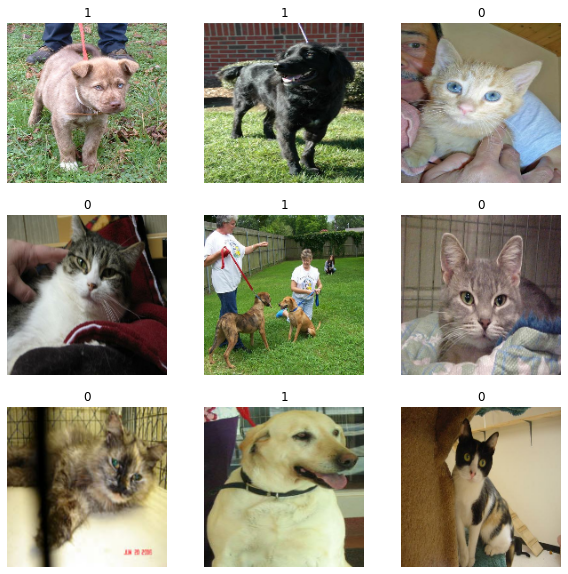

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    # print(images[i])
    plt.imshow(images[i].numpy().astype("uint8"))
    print(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

#### Data Agumentation

In [20]:
data_augmentation = keras.Sequential([
                                      layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1)
])

#### Visualize the Agumented image

tf.Tensor(
[[[[ 22.023148   19.023148   12.023149 ]
   [ 22.180555   19.180555   12.180555 ]
   [ 22.393517   19.393517   12.393516 ]
   ...
   [ 59.444458   42.444458   24.444458 ]
   [ 55.000183   38.66681    20.333496 ]
   [ 55.111084   40.111084   21.111084 ]]

  [[ 27.958334   24.958334   17.958334 ]
   [ 21.916666   18.916666   11.916666 ]
   [ 22.347221   19.347221   12.347221 ]
   ...
   [ 59.444458   42.444458   24.444458 ]
   [ 55.000183   38.66681    20.333496 ]
   [ 55.77774    40.77774    21.77774  ]]

  [[ 34.77778    31.777779   24.777777 ]
   [ 18.583334   15.583334    8.583334 ]
   [ 20.185186   17.185186   10.185186 ]
   ...
   [ 59.444458   42.444458   24.444458 ]
   [ 55.333496   39.000122   20.66681  ]
   [ 56.222168   41.222168   22.222168 ]]

  ...

  [[ 65.70834    42.708344   24.708344 ]
   [ 64.805565   41.80556    23.805563 ]
   [ 63.870377   40.870377   22.870375 ]
   ...
   [ 97.56949    81.56949    58.56949  ]
   [ 96.55556    79.88893    57.88887  ]
   [ 

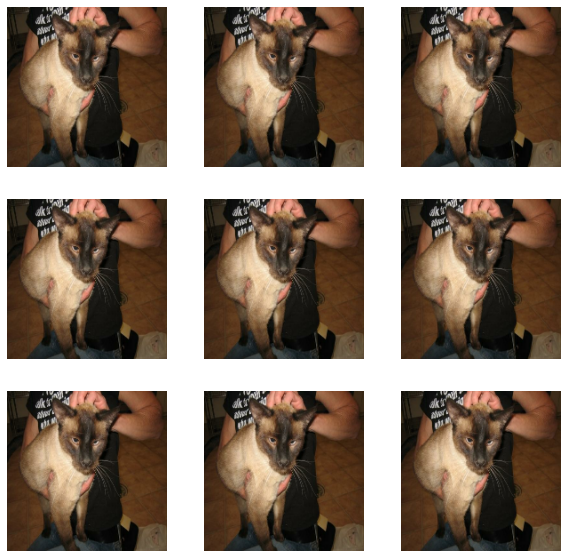

In [21]:
plt.figure(figsize=(10,10))

for images,_ in train_ds.take(1):
  for i in range(9):
    agumented_images = data_augmentation(images)# Data agumentation on training images
    print(agumented_images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(agumented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### Configure Data Performance

In [22]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

#### Build the model

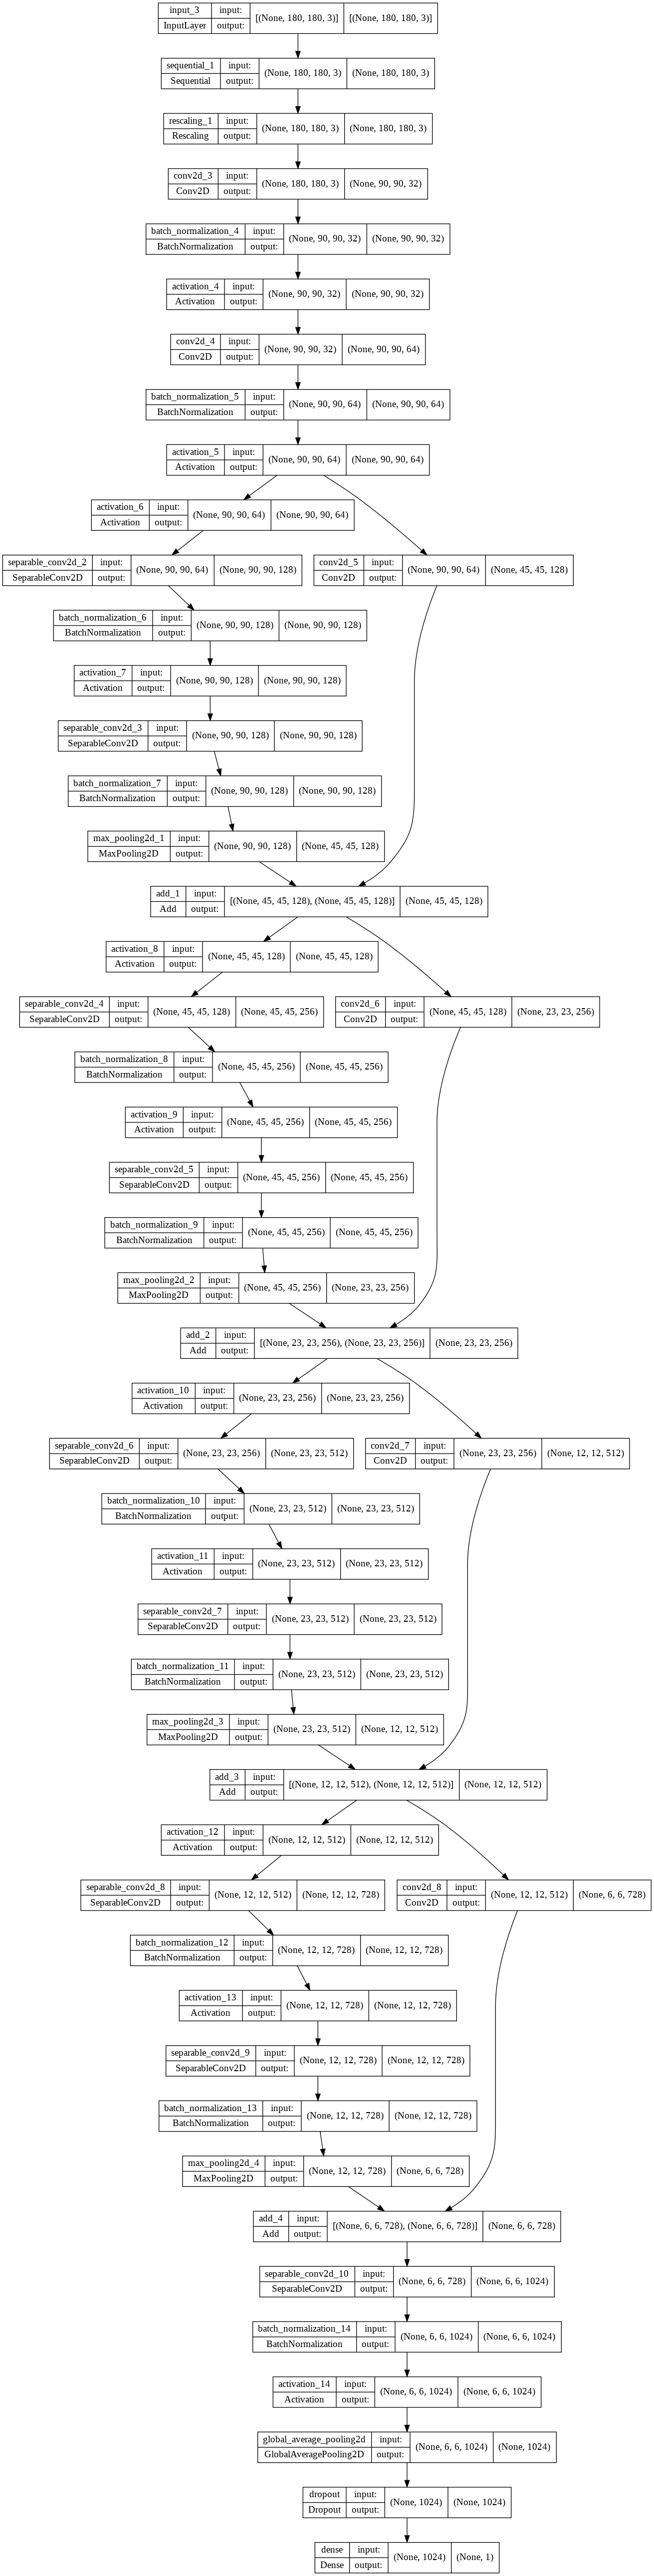

In [23]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

#### Train the Model

In [25]:
epochs = 30

callbacks = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5")]

model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/30
586/586 [==============================] - 306s 492ms/step - loss: 0.6315 - accuracy: 0.6560 - val_loss: 0.5711 - val_accuracy: 0.7117
Epoch 2/30
586/586 [==============================] - 286s 488ms/step - loss: 0.4611 - accuracy: 0.7844 - val_loss: 0.3828 - val_accuracy: 0.8323
Epoch 3/30
586/586 [==============================] - 287s 489ms/step - loss: 0.3508 - accuracy: 0.8458 - val_loss: 0.3657 - val_accuracy: 0.8516
Epoch 4/30
586/586 [==============================] - 286s 487ms/step - loss: 0.2774 - accuracy: 0.8795 - val_loss: 0.4031 - val_accuracy: 0.8353
Epoch 5/30
586/586 [==============================] - 286s 487ms/step - loss: 0.2384 - accuracy: 0.8995 - val_loss: 0.3117 - val_accuracy: 0.8565
Epoch 6/30
586/586 [==============================] - 285s 486ms/step - loss: 0.2107 - accuracy: 0.9126 - val_loss: 0.2300 - val_accuracy: 0.9024
Epoch 7/30
586/586 [==============================] - 286s 487ms/step - loss: 0.1944 - accuracy: 0.9192 - val_loss: 0.2369 -

#### Predict for new data

In [26]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 95.86 percent cat and 4.14 percent dog.
